In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [493]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/respiratoryrate vs r-r values/4000-remaining.csv")

In [494]:
df.head(1000)

,respiratoryrate,rrvalues
0,15.0363,0.663
1,15.0363,0.667
2,15.0363,0.675
3,14.7042,0.682
4,14.3056,0.684
...,...,...
995,14.1809,0.781
996,14.1809,0.758
997,14.0043,0.747
998,13.9222,0.761


In [495]:
df.describe()

,respiratoryrate,rrvalues
count,1112.000000,1112.000000
mean,13.165512,0.719023
std,3.077237,0.065043
min,5.883100,0.583000
25%,11.604800,0.671000
50%,13.495500,0.705000
75%,14.490025,0.767000
max,62.344300,1.409000


In [496]:
df.shape


(1112, 2)

In [497]:
cdf = df[['respiratoryrate','rrvalues']]
cdf.head(5)

,respiratoryrate,rrvalues
0,15.0363,0.663
1,15.0363,0.667
2,15.0363,0.675
3,14.7042,0.682
4,14.3056,0.684


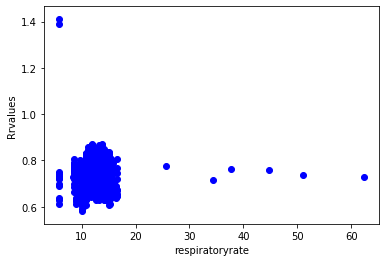

In [498]:
#graph of SNO vs r-r values

plt.scatter(cdf.respiratoryrate, cdf.rrvalues,color='blue')
plt.xlabel('respiratoryrate')
plt.ylabel('Rrvalues')
plt.show()

In [499]:
#splitting our data in 80-20 ratio for regression

In [500]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

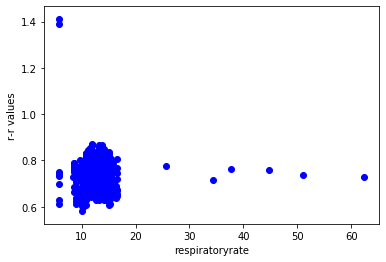

In [501]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")
plt.show()

In [502]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00169867]]
Intercept:  [0.74239383]


Text(0, 0.5, 'r-r values')

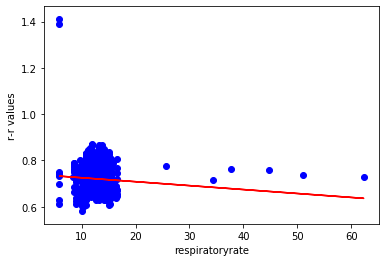

In [503]:
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")

In [504]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -270.54


In [505]:
#using polynomial regression

In [506]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.        ,  15.0363    , 226.09031769],
       [  1.        ,  15.0363    , 226.09031769],
       [  1.        ,  15.0363    , 226.09031769],
       ...,
       [  1.        ,  15.14      , 229.2196    ],
       [  1.        ,  15.14      , 229.2196    ],
       [  1.        ,  15.14      , 229.2196    ]])

In [507]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00819198  0.00012965]]
Intercept:  [0.80425348]


Text(0, 0.5, 'r-rvalues')

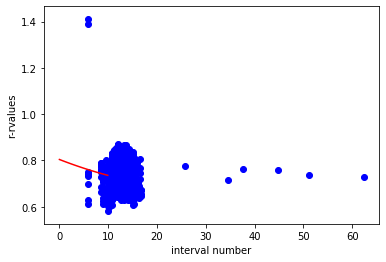

In [508]:
#plotting the polynomial regression
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [509]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -30.41
